In [65]:
!pip install -q pandas matplotlib seaborn scikit-learn

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import re

In [67]:
df = pd.read_csv("/content/netflix_titles.csv")

In [68]:
imputer = SimpleImputer(strategy='constant', fill_value='Missed Value')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [69]:
def extract_year_from_date(date_str):
    try:
        date = pd.to_datetime(date_str, errors='coerce')
        if pd.notnull(date):
            return str(date.year)
    except Exception as e:
        return 'Unknown'
    return 'Unknown'

In [70]:
df_filled['year_added'] = df_filled['date_added'].apply(lambda x: extract_year_from_date(x) if pd.notnull(x) else 'Unknown')

df_filled['year_added'] = pd.to_numeric(df_filled['year_added'], errors='coerce')

In [71]:
movies_per_year = df_filled.groupby('year_added').size()

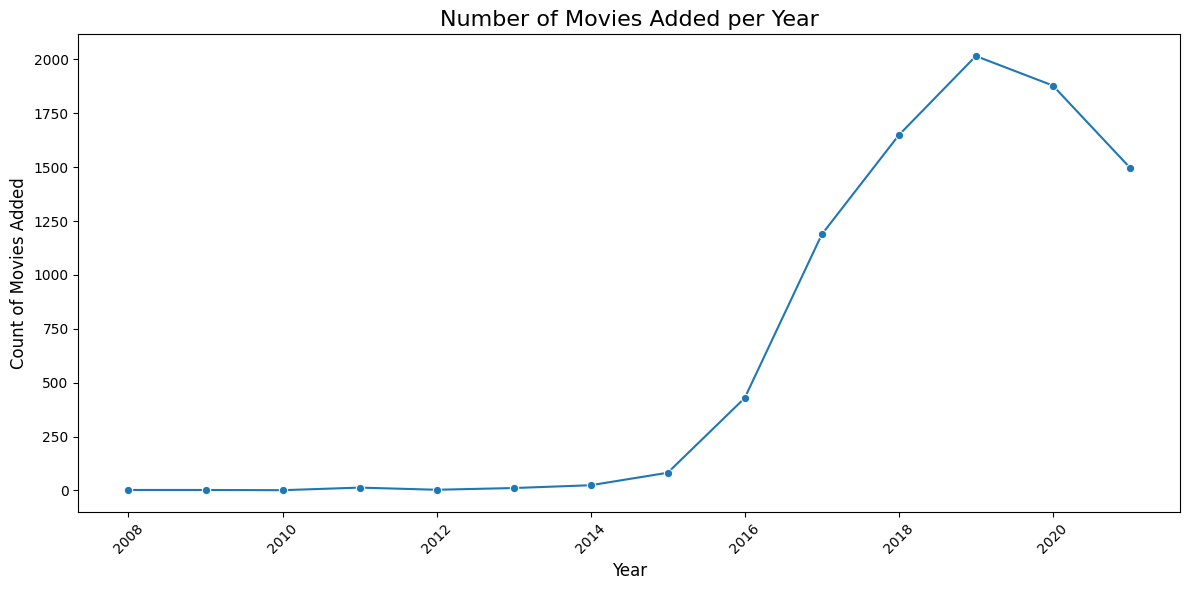

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Added per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Movies Added', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

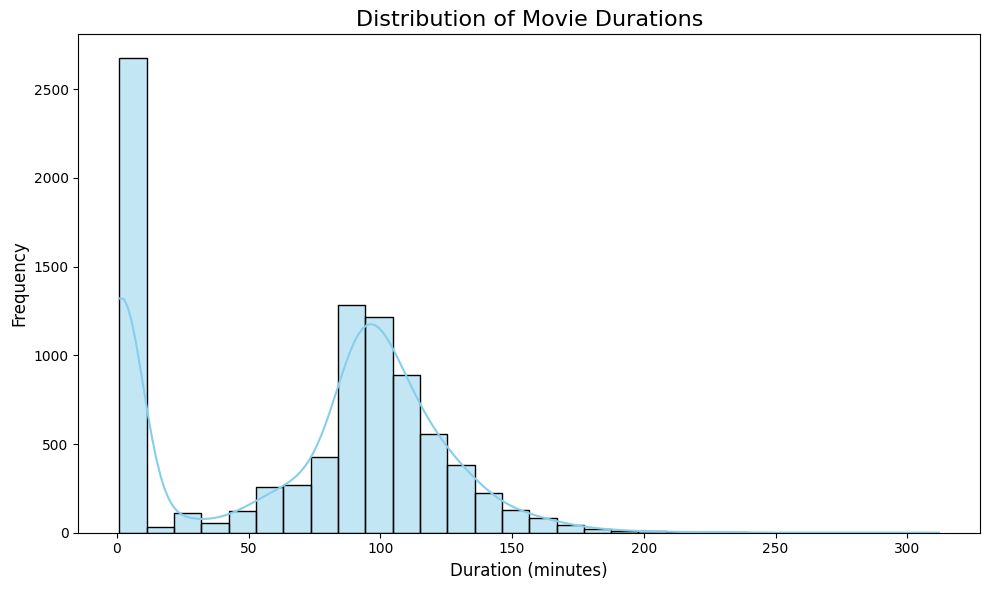

In [73]:
df_filled['duration_numeric'] = df_filled['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df_filled['duration_numeric'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-74-0e53dd6f666a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_longest_movies['duration_numeric'], y=top_10_longest_movies['title'], palette='viridis')


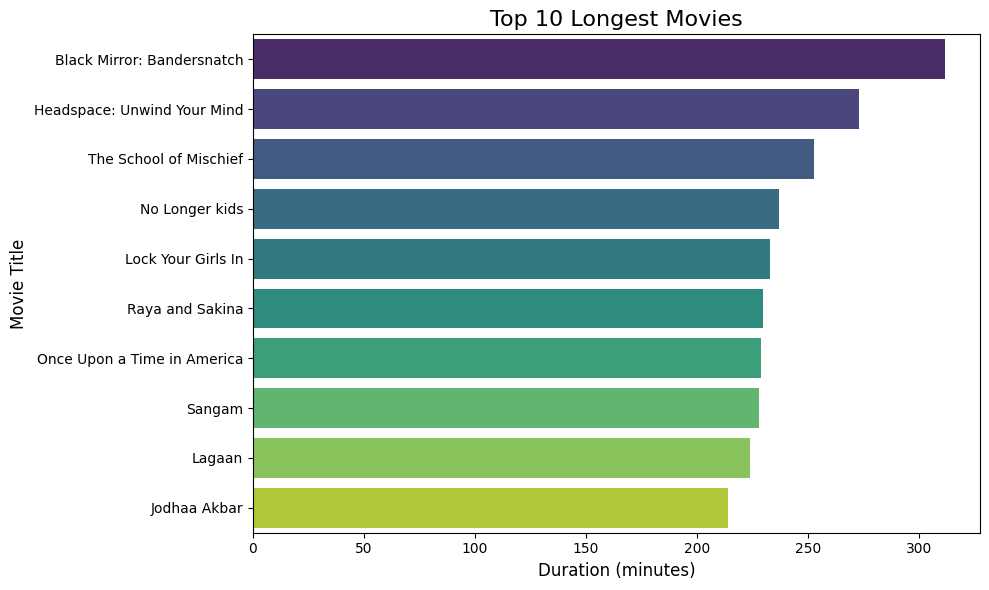

In [74]:
top_10_longest_movies = df_filled[['title', 'duration_numeric']].dropna().sort_values(by='duration_numeric', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_longest_movies['duration_numeric'], y=top_10_longest_movies['title'], palette='viridis')
plt.title('Top 10 Longest Movies', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-75-bfe049007565>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_filled['genre'], order=df_filled['genre'].value_counts().head(10).index, palette='coolwarm')


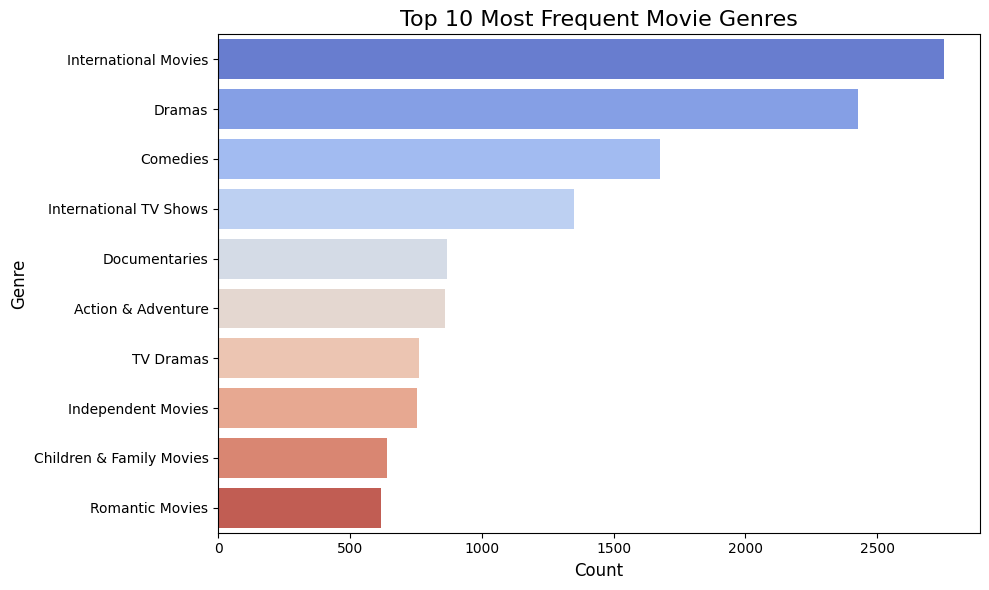

In [75]:
df_filled = df_filled.dropna(subset=['listed_in'])

df_filled['genre'] = df_filled['listed_in'].str.split(',')

df_filled = df_filled.explode('genre')

df_filled['genre'] = df_filled['genre'].str.strip()

df_filled = df_filled.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.countplot(y=df_filled['genre'], order=df_filled['genre'].value_counts().head(10).index, palette='coolwarm')
plt.title('Top 10 Most Frequent Movie Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()
